### Trabalho de SAD  
### Aluno: Jordan Mendonça Costa   matrícula:  0050009885  
### Professor: Alex Salgado
* Preencha sua resposta no próprio arquivo do Jupyter e depois me envie no link que vou colocar no basecamp.

# Tarefa simples de Classificação

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/03_getting_started_with_iris.ipynb

1 - importar os modulos python para machine learn e carregar o arquivo fruit_data_with_colors2.xlsx usando o método read_excel do pandas

In [1]:


%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_excel('fruit_data_with_colors2.xlsx')



2 - Exibir os primeiros registros desta tabela

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Machine learning terminology
Each row is an observation (also known as: sample, example, instance, record)
Each column is a feature (also known as: predictor, attribute, independent variable, input, regressor, covariate)

3.1 - Quantas observações têm nessa base de dados?  
3.2 - Quantas "features" têm nessa base de dados?

In [3]:
fruits.count()

fruit_label      59
fruit_name       59
fruit_subtype    59
mass             59
width            59
height           59
color_score      59
dtype: int64

Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)
Classification is supervised learning in which the response is categorical
Regression is supervised learning in which the response is ordered and continuous

4.1 - Quantas respostas temos nessa base?  
4.2 - Para fazer nossas previsões em cima desta base, devemos usar algoritmo de Classificação ou Regressão?  

In [17]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# store feature matrix in "X"
X = ???

# store response vector in "y"
y = ???

5 - Como você pode gerar a matriz X de feature e o vetor y de respostas? Dica: use essas 3 features para X ['mass', 'width', 'height'] e a resposta deve ser ['fruit_label'].

In [4]:


X = fruits[['mass','width','height']]
y = fruits[['fruit_label']]



## Training a machine learning model with scikit-learn


K-nearest neighbors (KNN) classification  
6.1 - Usando o algoritmo de KNN (com 1 vizinho, k=1), qual a previsão? Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20,	width=4.3,	height=5.5).


Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/04_model_training.ipynb



In [5]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X,y.values.ravel())
knn.predict([[20,4.3,5.5]])



array([2], dtype=int64)

Agora faça a mesma previsão, usando os seguintes algoritmos: 
6.2 - KNN(k=5)  


In [6]:


### 6.3 - LogisticRegression  

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y.values.ravel())
logreg.predict([[20,4.3,5.5]])



array([2], dtype=int64)

e 6.3 - LogisticRegression  


## Evaluation procedure #1: Train and test on the entire dataset
7 - Usando o método de avaliação de acurácia (Treinar e testar na base de dados inteira), qual dos 3 métodos do item 6 é mais eficiente?

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb


7.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [7]:
### 7 - A acurácia do KNN com vizinhos igual a 5 foi: 0.779661016949, KNN = 1 foi: 1.0 e logisticRegression foi: 0.745762711864.
### A acurácia mais alta foi do KNN=1, porém o professor disse que devemos desconfiar quando a acurácia é muito alta.

### 7.1
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y.values.ravel())
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


7.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [8]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y.values.ravel())
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.779661016949


7.3 - Acurácia usando o algoritmo de LogisticRegression


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y.values.ravel())
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.745762711864


## Evaluation procedure #2: Train/test split
Usando o método de avaliação de acurácia (Treinar e testar SEPARADAMENTE), qual dos 3 métodos do item 6 é mais eficiente?
Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

8.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [10]:
## Usando o método de avaliação de acurácia(treinar e testar separadamente), o método que deu a acurácia mais alta foi o LogisticRegression a acurácia obtida foi: 0.583333333333  
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=4)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.541666666667


C:\Users\Chip7\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


8.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.333333333333


8.3 - Acurácia usando o algoritmo de LogisticRegression

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.583333333333


## Can we locate an even better value for K?
Faça um programa python para testar diferentes valores de K entre 1 e 25 e diga através de gráfico, qual foi o melhor valor de K que obteve a melhor performance?


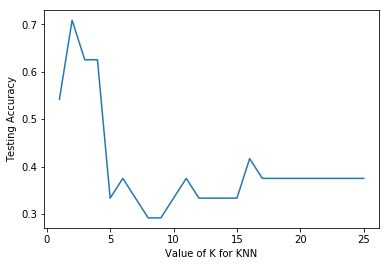

In [13]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Utilizando este seu último ajuste de K, faça novamente a seguinte previsão. Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20, width=4.3, height=5.5

In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.708333333333
